# Understanding Logistic Regression (PyData DC 2016)
#### Nadia Udler, Nicholas Liu

[Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression) is a well-known method to model conditional probabilities. Despite its name, it is a linear classification model rather than regression. To begin with, let's consider a simple example as below.

## Example: Passing Exam

Given a group of 20 students who spend between 0 and 6 hours studying for an exam. We'd like to know how the number of hours spent studying affects the probability that the student will pass the exam. We store our sample in `numpy.array`, denote 1 if a student passes the exam and 0 if fails.

In [1]:
import numpy as np
hours = np.array([0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,
                  2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50])
pass_exam = np.array([0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1])

A naive way to approach this problem is to use linear regression. But the dependent variable is binary rather than continuous in our case. And although it doesn't hurt to interpret numbers between 0 and 1 as probabilities, for very large and small independent variables, the output of the linear regression can be either negative or larger than 1, making the result nonsensical. Also, for the linear equation to hold, error term has to adjust so that they are correlated with independent variables. 


However, another argument not to use linear regression is simply because visually, the problem is not linear at all! Try the following code,

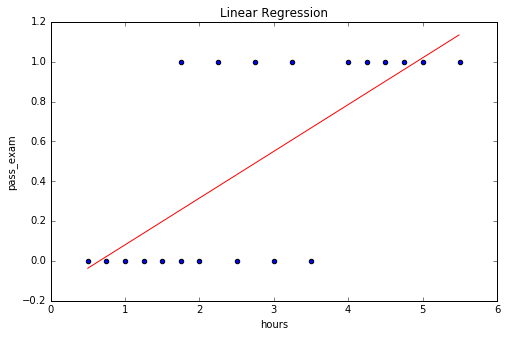

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

# Linear regression
model = linear_model.LinearRegression()
model.fit(hours.reshape(-1, 1), pass_exam)

# Plot
x = np.arange(np.min(hours), np.max(hours), 0.01)
y = model.coef_ * x + model.intercept_
plt.figure(figsize=(8, 5))
plt.scatter(hours, pass_exam)
plt.plot(x, y, 'red')
plt.title('Linear Regression')
plt.xlabel('hours')
plt.ylabel('pass_exam')

## From Conditional Probabilities to Logistic Regression

To handle our problem, we may conceive of a rule that guesses result based on input values. But we definitely need a bridge to jump to a decision of "pass" or "fail". And it's natural to come up with probabilities as the bridge. In short, we can model the probability of passing (or equivalently, failing the exam) instead and then give predictions based on such probability.

<br>
Assume that the event of interest is passing the exam, further assume independent observations, then the conditional likelihood function of y given x is

<br>
$$\prod_{i=1}^{\infty} \Pr\left(y=y_{i}|x=x_{i} \right)$$

<br>
Now, one way to think about each term inside multiplication symbol is that they follow [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution) with parameter $p_{i}, i=1,...,n$. Then the above conditional likelihood function becomes

<br>
$$\prod_{i=1}^{\infty} \Pr\left(y=y_{i}|x=x_{i} \right)=\prod_{i=1}^{\infty} p_{i}^{y_{i}}(1-p_{i})^{1-y_{i}}$$

<br>
But maximizing above function by changing $p_{1}, p_{2},..., p_{n}$, we get trivial estimators $\hat{p_{i}}=1$ if $y_{i}=1$ and $\hat{p_{i}}=0$ if $y_{i}=0$. The reason such result is useless is becasue that we didn't even us $x$! In fact, it makes sense to believe that close $x$ inputs are more likely to have close outputs. So instead of assuming a sequence of Burnoulli distributions, we assume a parameterized conditional probability as $\Pr\left(y=1{\mid}x\right)=\Pr\left(y=1{\mid}x;\beta\right)=p(x; \beta)$ where $\beta$ are parameters in the function. Then the likelihood function becomes

<br>
$$\prod_{i=1}^{\infty} \Pr\left(y=y_{i}|x=x_{i} \right)=\prod_{i=1}^{\infty} {p(x_{i};\beta)}^{y_{i}}(1-{p(x_{i};\beta)})^{1-y_{i}}$$

<br>
Now, as long as we know the exact form of function $p(x;\beta)$, we can explicitly solve the problem using [maximum likelihood estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation). This last piece requires a bit of imagination and is left for the next part logit function and logistic function.

## Logit Function and Logistic Function

### Logit Function

Previously, we mentioned that we cannot model probability directly as a linear expression of $x$ because output outside range $(0,1)$ can be obtained. This suggests we modify $p(x;\beta)$ first to let it cover every real number. Mathematically, we can use the logit function

<br>
$$f(x)=\ln\left(\frac{x}{1-x}\right)$$

<br>
which maps values from interval $(0, 1)$ to ${\rm I\!R}$. 

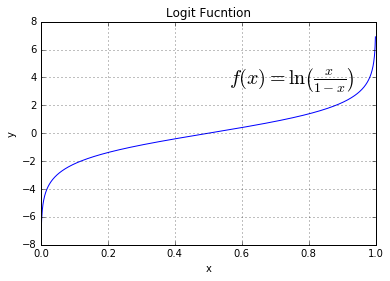

In [3]:
# Plot logit function
x = np.arange(0.001, 1, 0.001)
y = np.log(x / (1 - x))
plt.plot(x,y)
plt.title('Logit Fucntion')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.text(0.75, 3.5, r'$f(x)=\ln\left(\frac{x}{1-x}\right)$', horizontalalignment='center', fontsize=20)

At this point, a talented reader may wonder why we use logit function when there are other functions that map probabilities to reals? While some may argue that it is because of its simplicity and interpretability (note that we can interprete $\ln\left(\frac{x}{1-x}\right)$ as logarithm of odds ratio), it's probably more of a matter of personal taste. Remember that ["All models are wrong but some are useful"](https://en.wikipedia.org/wiki/All_models_are_wrong), using logit function doesn't guarantee you everthing. See [link](http://stats.stackexchange.com/questions/48072/is-the-logit-function-always-the-best-for-regression-modeling-of-binary-data?newreg=e51a5f412a1549e5b0e3b0c99c0fb549) about a discussion on this question and learn other alternatives to logit function.

### Logistic Function

Using logit transformation, we estimate log odds ratio as a linear expression

<br>
$$\ln\left(\dfrac{p(x;\beta)}{1-p(x;\beta)}\right)=\beta'x$$

<br>
where $\beta$ and $x$ are treated as column vectors. For notational convenience, we assume $\beta'x$ contains the constant term $\beta_0 \cdot 1$. Readers should keep in mind that the right side of the equation should in fact be $\beta'\begin{pmatrix}1\\x\end{pmatrix}$, however, this is quite cumbersome.

<br>
Take exponential function of both sides and after some simple algebraic manipulation, we end up with the exact form of $p(x;\beta)$ as below

<br>
$$p(x;\beta)=\dfrac{1}{1+e^{-\beta'x}}$$

<br>
Mathematically, the function on the right hand side with regard to $\beta'x$ is called [logistic function](https://en.wikipedia.org/wiki/Logistic_function), also known as sigmoid function or expit function. It can be easily shown that logsitic function is in fact the inverse of logit function. Rather than roll your own, you can use the built-in `expit` function from `scipy.special` module. Let's first have a visual impression of logistic function,

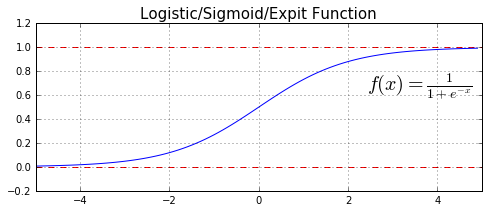

In [4]:
# Import built-in logistic function
from scipy.special import expit
x = np.arange(-5, 5, 0.1)
y = expit(x)
plt.figure(figsize=(8, 3))
plt.plot(x, y)
plt.hlines([0, 1], -5, 5, colors='r', linestyles='dashed')
plt.grid(True)
plt.axis([-5, 5, -0.2, 1.2])
plt.title('Logistic/Sigmoid/Expit Function', fontsize=15)
plt.text(3.6, 0.65, r'$f(x)=\frac{1}{1+e^{-x}}$', horizontalalignment='center', fontsize=20)

## Back to Maximum Likelihood Estimation

Recall that conditional likelihood function is

<br>
$$\prod_{i=1}^{\infty} \Pr\left(y=y_{i}|x=x_{i} \right)=\prod_{i=1}^{\infty} {p(x_{i};\beta)}^{y_{i}}(1-{p(x_{i};\beta)})^{1-y_{i}}$$

<br>
Now plug in the explicit form $p(x;\beta)=\dfrac{1}{1+e^{-\beta'x}}$, take log of both sides and simplify our log likelihood function as much as possible

<br>
$$\begin{align}\ln(L(x, y; \beta))
&=\sum\limits_{i=1}^n [y_i\ln(p(x_i;\beta))+(1-y_i)\ln(1-p(x_i;\beta))]
\\&=\sum\limits_{i=1}^n [y_i\ln(\dfrac{1}{1+e^{-\beta'x_i}})+(1-y_i)\ln(1-\dfrac{1}{1+e^{-\beta'x_i}})] 
\\&=\sum\limits_{i=1}^n [y_i\ln(\dfrac{1}{1+e^{-\beta'x_i}})+(1-y_i)\ln(\dfrac{e^{-\beta'x_i}}{1+e^{-\beta'x_i}})]
\\&=\sum\limits_{i=1}^n [y_i\ln(\dfrac{1}{1+e^{-\beta'x_i}})+(1-y_i)\ln(\dfrac{1}{1+e^{\,\beta'x_i}})]
\\&=-\sum\limits_{i=1}^n [y_i\ln(1+e^{-\beta'x_i})+(1-y_i)\ln(1+e^{\,\beta'x_i})]
\\&=-\sum\limits_{i=1}^n\begin{cases}
    \ln(1+e^{-\beta'x_i})       & \quad \text{if } y_i \text{ is 1}\\
    \ln(1+e^{\,\beta'x_i})  & \quad \text{if } y_i \text{ is 0}\\
  \end{cases}
\\&=-\sum\limits_{i=1}^n\ln(1+e^{\,-y_i\beta'x_i})\qquad\,\text{redefine } y_i \text{ such that } y_i=1 \text{ if } y_i==1 \text{ and } y_i=-1 \text{ if } y_i==0
\end{align}$$

<br>
We will solve for $\hat{\beta}$ such that $\ln(L(x, y; \beta))$ is maximized at $\hat{\beta}$. The reason that we maximize the log likelihood function instead of the likelihood function is because summing comes easier than multiplication, more importantly, the likelihood function can be very small for large dataset and result in floating point underflow. 

### Building Log (Conditional) Likelihood Function

We'd like to take advantage of matrix algebra in our code and ensure high performance. The standard way is to use `array` in `numpy` module rather than `list` object in standard Python library. Also, methods in `numpy` module usually support faster vectorized implementation. 

<br>
Suppose $x$ is a 2-dimensional array such that its columns are independent variables and each row is an observation, we further assume that all elements are 1 in the first column of $x$ (don't forget the constant term!). Next, suppose (redefined) $y$ and $\beta$ are both stored in a column vector. Then, matrix product $x\beta$ is just a column vector such that its $i$th row is exactly $\beta'x_i$, and element-wise product $y$ times $x\beta$ is just a column vector such that its $i$th row is exactly $y_i\beta'x_i$. The log likelihood function $-\sum\limits_{i=1}^n\ln(1+e^{\,-y_i\beta'x_i})$ then is just a one-line code: `-np.sum(np.log(1 + np.exp(- y * np.dot(x, p))))`.

<br>
One thing to be cautious here is that `np.array` can be 1-dimensional when storing a series of numbers and cause trouble to matrix algbra, especially matrix multiplication. To solve this problem, always use [`reshape`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) method before any matrix manipulations.

<br>
In the following snippet, a closure is used to separate parameter $\beta$ and non-parametric variables $x$ and $y$. A closure is essentially an inner function (`log_likelihood_p`) that is dynamically generated by another function and can remember the variables passed from outer function (`log_likelihood`). Also, you can use [`functools.partial`](https://docs.python.org/3.7/library/functools.html#functools.partial) to accomplish the same thing.

In [5]:
def log_likelihood(x, y):
    "Outer function"
    def log_likelihood_p(p):
        "Inner Function"
        p = p.reshape(-1, 1)
        return -np.sum(np.log(1 + np.exp(- y * np.dot(x, p))))
    return log_likelihood_p # log_likelihood_p has variable p to be estimated

### Set Up Optimization Solver

What we need to do next is to estimate parameters $\beta$ in function `log_likelihood_p`. Python's  `scipy.optimize` package provides several commonly used optimization algorithms. Here, we use [basin-hopping](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.basinhopping.html#scipy.optimize.basinhopping) algorithm to find global maximum and choose [Nelder-Mead](http://docs.scipy.org/doc/scipy/reference/optimize.minimize-neldermead.html#optimize-minimize-neldermead) solver as its inner method. Readers can also see [here](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) to find other optimization methods. For example, if gradient and Hessian matrix of our log likelihood function are provided, some faster methods may be applied (however, they might suffer from numerical instability). I also tried writing another function to return gradient of our likelihood function and fed it to [`BFGS`](http://docs.scipy.org/doc/scipy/reference/optimize.minimize-bfgs.html#optimize-minimize-bfgs) solver in `scipy`, and it worked much faster. But since this tutorial is not about optimization methods, we will leave derivative-based methods to curious readers. 

<br>
But before we run solver, don't forget to redefine $y$. Recall that user inputs $y_i$ such that $y_i \in \{1, 0\}$, but in our `log_likelihood` function, we redefine $y_i$ such that $y_i \in \{1, -1\}$. To transform $y$, we can use the function [`np.place`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.place.html), which changes elements of an array based on conditional and input values. In addition, because solvers in `scipy` by default minimize function, we also need to first negate our log likelihood function, which is done through function `negate`.

In [6]:
from scipy.optimize import basinhopping

def negate(f):  
    return lambda *args, **kwargs: -f(*args, **kwargs)

def logistic_regression(x, y, x0=None, niter=500):
    """
    x0: inital guess to be passed into optimization
    niter: the number of basin hopping iterations
    """
    # If x0 not provided, use zero vector
    if x0 is None:
        x0 = np.zeros_like(x[0])
    # Ensure y is 2-dimensional column vector
    y = y.reshape(-1, 1)
    # Redefine y
    np.place(y, y==0, [-1])
    minimizer_kwargs = {'method':'nelder-mead'}
    result = basinhopping(negate(log_likelihood(x, y)), x0, 
                          minimizer_kwargs=minimizer_kwargs, niter=niter)
    return result.x # Attribute x returns solution array

### Put Into Production

Before applying our program, let's add one more function that checks user input. We ask users to provide `np.ndarray` type data because all the operations inside our log likelihood function is built upon `np.ndarray`. In fact, it's pretty easy to transform from other array-like datatype to `np.ndarry`, simply use `np.array` method.

In [7]:
def input_check(x, y, x0):
    # For convenience, x, y, initial guess x0 must be np.ndarray
    if type(x) == type(y) == type(x0) == np.ndarray:
        # check if 1st column of x is a zero vector
        if (x[:,0:1] == np.ones_like(x[:,0:1])).all():
            pass
        else:
            raise ValueError('Intercept column is missing')
    else:
        raise TypeError('np.ndarray is expected but recieved other types')

In addition, be wary of failed optimization. Many reasons can result in a failed optimization. Fortunately, whether or not the optimizer exited successfully is stored inside the optimization result and we can return a warning message when the optimization fails. Now we can modify function `logistic_regression` by incorporating `input_check` and altering output part.

In [8]:
def logistic_regression(x, y, x0=None, niter=500):
    """
    x0: inital guess to be passed into optimization
    niter: the number of basin hopping iterations
    """
    # If x0 not provided, use zero vector
    if x0 is None:
        x0 = np.zeros_like(x[0])
    # Check inputs
    input_check(x, y, x0)
    # Ensure y is 2-dimensional column vector
    y = y.reshape(-1, 1)
    # Redefine y
    np.place(y, y==0, [-1])
    minimizer_kwargs = {'method':'nelder-mead'}
    result = basinhopping(negate(log_likelihood(x, y)), x0, 
                          minimizer_kwargs=minimizer_kwargs, niter=niter)
    # Check if optimizer exited successfully
    if str(result).find('success: True') != -1:
        print('Estimated coefficients: ')
        print(*result.x, sep=', ') 
        return result.x
    else:
        print('Error: optimization failed')

## Solving Example: Passing Exam

Let's apply our `logistic_regression` to our example. It works well and yields estimated coefficients as below

In [9]:
hours = np.array([0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,
                  2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50])
# Transform to a 2-dimensional matrix, 1st column is a column of 1s
hours = np.concatenate((np.ones((20,1)), hours.reshape(-1,1)), axis=1)
pass_exam = np.array([0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1])
est = logistic_regression(hours, pass_exam)

Estimated coefficients: 
-4.07772242367, 1.50464857319


These estimates are entered in the logistic regression equation to estimate the probability of passing the exam. For example, for a student who studies 4 hours, the estimated probability of passing the exam would be $\dfrac{1}{1+e^{-(-4.0777+1.5046\times4)}}=0.87$. Next, we define the classification rule that a student is classified to "pass" if his/her estimated probability of passing the exam is larger than $0.5$, otherwise, the student is classified to "fail". 

<Br>
In general, if $p(x;\beta)=\dfrac{1}{1+e^{-\beta'x}}>0.5$, or equivalently, $\beta'x>0$, we predict y=1 and classify the event to corresponding side. If on the other hand $p(x;\beta)=\dfrac{1}{1+e^{-\beta'x}}\leqslant0.5$, or equivalently, $\beta'x\leqslant0$, we classify the event to y=0. As mentioned before, logistic regression is a classification method (also note that it is a linear classification method!). In machine learning, it belongs to the category of [supervised learning](https://en.wikipedia.org/wiki/Supervised_learning), a method of machine learning where the categories are predefined, and is used to classify unseen instances based on certain algorithm inferred from training data.

<Br>
Let's visualize our classification rule now. Mathematically, it is just a point $x=\dfrac{-\beta_0}{\beta_1}$, but here we can also plot it on a 2-dimensional plane.

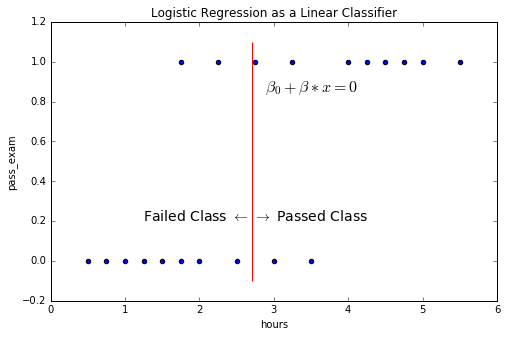

In [10]:
# Data
hours = np.array([0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,
                  2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50]).reshape(-1,1)
pass_exam = np.array([0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1])
# Plot
x= -est[0] / est[1] # est[0], est[1] are estimated coefficients
plt.figure(figsize=(8, 5))
plt.scatter(hours, pass_exam)
plt.vlines(x, -0.1, 1.1, colors='red')
plt.title('Logistic Regression as a Linear Classifier')
plt.xlabel('hours')
plt.ylabel('pass_exam')
plt.text(3.5, 0.85, r'$\beta_0 + \beta*x=0$', horizontalalignment='center', fontsize=16)
plt.text(3.5, 0.2, r'$\rightarrow$ Passed Class', horizontalalignment='center', fontsize=14)
plt.text(1.95, 0.2, r'Failed Class $\leftarrow$', horizontalalignment='center', fontsize=14)

## Example 2: Admission into Graduate School

In example 1, there's only one independent variable (hours) and the size of the sample is quite small (only 20). To better test our code, let's web scrape a larger dataset from <http://www.ats.ucla.edu/stat/data/binary.csv>. The example is thanks to [R Data Analysis Examples: Logit Regression. UCLA: Statistical Consulting Group.](http://www.ats.ucla.edu/stat/r/dae/logit.htm). In example 2, a researcher is interested in how variables, such as GRE (Graduate Record Exam scores), GPA (grade point average) and prestige of the undergraduate institution, effect admission into graduate school. The response variable, admit/don't admit, is a binary variable.

<Br>
We use `urllib.request` module for web scraping, and `pandas` library for reading data.

In [11]:
import pandas as pd
from urllib.request import urlretrieve
# URL
url = 'http://www.ats.ucla.edu/stat/data/binary.csv'
# Extract data and save into file admission.csv on current directory
urlretrieve(url, './admission.csv')
# Read csv data and store in DataFrame format
data = pd.read_csv('./admission.csv')
# Display top 5 observations
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


This dataset has one categorical independent variable called rank that takes on the values 1 through 4. Let's first transform it to three dummy variables with rank=1 dropped. In Python, a package called [`pasty`](http://patsy.readthedocs.io/en/latest/index.html#) is specifically designed to build design matrices suitable for statistical models. Below, we import [`dmatrices`](http://patsy.readthedocs.io/en/latest/API-reference.html) method which returns two design matrices y and x while categorizing rank variable using method [`C()`](http://patsy.readthedocs.io/en/latest/categorical-coding.html). The number "1" inside the formula stands for intercept column and we also assigned argument `return_type` to `DataFrame` in `pandas`.

In [12]:
from patsy import dmatrices
y, x = dmatrices('admit ~ 1 + gre + gpa + C(rank)', data, return_type = 'dataframe')
x.head()

,Intercept,C(rank)[T.2],C(rank)[T.3],C(rank)[T.4],gre,gpa
0,1.0,0.0,1.0,0.0,380.0,3.61
1,1.0,0.0,1.0,0.0,660.0,3.67
2,1.0,0.0,0.0,0.0,800.0,4.00
3,1.0,0.0,0.0,1.0,640.0,3.19
4,1.0,0.0,0.0,1.0,520.0,2.93


Apply our logistic regression program to example 2

In [13]:
y = np.array(y, dtype=np.float64)
x = np.array(x, dtype=np.float64)
logistic_regression(x, y)

Estimated coefficients: 
-3.99001808561, -0.675432176804, -1.34019999625, -1.55145348594, 0.00226443704945, 0.804044522069


array([ -3.99001809e+00,  -6.75432177e-01,  -1.34020000e+00,
        -1.55145349e+00,   2.26443705e-03,   8.04044522e-01])

Our result is the same as what given on UCLA website.

## Scikit-Learn Logistic Regression

[`Scikit-learn`](http://scikit-learn.org/stable/index.html#) is a Python package that is intensely used in the field of machine learning and data science. The package implements logistic regression through class [`sklearn.linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Before we delve into the implementation of logistic regression in `scikit-learn`, we will briefly go through several useful concepts, they are cost function, overfitting (underfitting), linear separability, L1/L2 regularization and OvR technique.

### Cost Function

Recall that when we estimated parameters using conditional maximum likelihood funciton, we minimized the negative value of likelihood function `negate(log_likelihood(x, y))`. In fact, `negate(log_likelihood(x, y))` is called cost function. As its name would suggest, the lower the cost, the better mapping from training examples to correct output.

<Br />
Since our likelihood function is $\ln(L(x, y; \beta))=-\sum\limits_{i=1}^n\ln(1+e^{\,-y_i\beta'x_i})$ with redefined $y$, the cost function is therefore $cost(x, y; \beta)=\sum\limits_{i=1}^n\ln(1+e^{\,-y_i\beta'x_i})$


### Overfitting and Underfitting

In machine learning, [overfitting](https://en.wikipedia.org/wiki/Overfitting) describes the situation when a model performs well on training data but has bad predictions on unseen data. It happens when a model is too complex, for instance, when a model has too many parameters and tries to even describe noisy data. Underfitting, on the other hand, happens when a model is too simple and unable to catch important signals.

<Br />
![Overfitting](http://pingax.com/wp-content/uploads/2014/05/underfitting-overfitting.png)

### Linear Separability

As mentioned above, logistic regression is a linear classifier because it eventually reduces to $\beta'x=0$. However, when the sample classes are completely linearly separable, a problem that the maximum likelihood estimates of $\beta$ tend to infinity would be triggered (the mathematical proof is left to the readers). In some programming languages like R, a warning message would be returned to users in this case.

<br>
<img src="http://3.bp.blogspot.com/-OVlHHKeYq28/Ukh6vBgVx3I/AAAAAAAACEI/5vw6LfK1xlY/s1600/linearly_separable_4.png" width="300" height="300" />

<br>
There are several methods to recognize linear separability from the very beginning, and linear programming is a standard way to do this. Basically, for a two-class problem, suppose $A=\{a_1, a_2, \ldots, a_n\}\subset {\rm I\!R}^n$ and $B=\{b_1, b_2, \ldots, b_n\}\subset {\rm I\!R}^n$ are the dichotomous classes, then statement that a hyperplane such that it separates A and B exists  is equivalent to the statement that there exist a column vector $\beta\in {\rm I\!R}^n$ and a scaler $c\in {\rm I\!R}$ that satisfies the inequalities as below

<br>
$$\begin{bmatrix} a_1&-1\\{\vdots}\\a_n&-1\\-b_1&1\\{\vdots}\\-b_n&1 \end{bmatrix}\begin{bmatrix}\beta\\c\end{bmatrix}<\begin{bmatrix}0\\ {\vdots}\\0\end{bmatrix}$$ 

<br>
Feed this to any linear programming solver, for instance, [`scipy.optimize.linprog`](http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.optimize.linprog.html).

<br>
In addition, we can somehow mutate the cost function of logistic regression and get non-inflated estimates. This is exactly how `scikit-learn` tackles linear separability. It adds a regularization term to the cost function (we will talk about this soon).

<br>
At the other extreme, our training set might be anything but linearly separable, for example, in the following graph, it seems an ellipse might separate our classes.

<br>
<img src="http://i.stack.imgur.com/LZWS8.png=10x10" width="400" height="400" />

<br>
In such case, we may need to provide a mapping function to the independent variables. For example, rather than using linear expression of independent variables as shown in $\ln\left(\dfrac{p(x;\beta)}{1-p(x;\beta)}\right)=\beta'x$, we may apply the general analytical form of an ellipse such that $\ln\left(\dfrac{p(x;\beta)}{1-p(x;\beta)}\right)=\beta_1{x_1^2}+\beta_2{x_1}{x_2}+\beta_3{x_2^2}+\beta_4{x_1}+\beta_5{x_2}+\beta_6.$ In addition, we can also use nonlinear classification methods, for instance, neural network may be a good alternative here.

### L1/L2 Regularization

One way to tackle overfitting and complete linear separability is by adding a [L1/L2 regularization](https://www.quora.com/What-is-the-difference-between-L1-and-L2-regularization) term to the cost function. The idea behind regularization is to penalize parameters that have very large absolute values. 

<Br />
Mathematically, L2 regularization is $\dfrac{\lambda}{2}\sum\limits_{i=1}^n\beta_i^2$ and L1 regularization is $\lambda\sum\limits_{i=1}^n|\beta_i|$, where $\beta_1,\,\beta_2,...$ are parameters to be estimated, and $\lambda$ is a positive number called "regularization strength". Here, $\lambda$ is just a weight scaler put on the regularization term, and the higher of $\lambda$, the more weight we put on the regularization term. Also note that the denominator $2$ in the L2 term is just for the convience of computation (you can also not include them). In fact, we have $\dfrac{\lambda}{2}\sum\limits_{i=1}^n\beta_i^2=\dfrac{\lambda}{2}\beta'\beta$, which is a quadratic form and taking derivative of this quadratic form would produce some $2$s.

<Br />
In `scikit-learn`, logistic regression minimizes 
![L2](http://scikit-learn.org/stable/_images/math/6a0bcf21baaeb0c2b879ab74fe333c0aab0d6ae6.png)
for L1 regularity and minimizes
![L1](http://scikit-learn.org/stable/_images/math/760c999ccbc78b72d2a91186ba55ce37f0d2cf37.png)
for L2 regularity. They are just the sum of cost function and regularization term. To show this, take L2 regularization as an example, we have

<Br />
$$\begin{align}\mathrm{\arg\min}(\text{L2}+cost(x, y; \beta))&=\mathrm{\arg\min}(\dfrac{\lambda}{2}\beta'\beta+\sum\limits_{i=1}^n\ln(1+e^{\,-y_i\beta'x_i}))\\&=\mathrm{\arg\min}(\dfrac{1}{2}\beta'\beta+\dfrac{1}{\lambda}\sum\limits_{i=1}^n\ln(1+e^{\,-y_i\beta'x_i}))\\&=\mathrm{\arg\min}(\dfrac{1}{2}\beta'\beta+C\sum\limits_{i=1}^n\ln(1+e^{\,-y_i\beta'x_i}))\end{align}$$

<Br />
Here,the capital letter $C$ in both equations are just the inverse of regularization strength, i.e., $C=\dfrac{1}{\lambda}$. And $y_i(X_i^Tw+c)$ is just $y_i\beta_i'x$ in our notation (recall that we didn't explicitly write the constant coefficient for the simplicity of our likelihood function).

### From Binary Classification to Multiclass Classification: Applying OvR Technique

So far, we have applied logistic regression to binary classification. But what if we have more than two classes to be classified? A `Scikit-learn`, a multiclass classification problem is by default handled by a technique called OvR (One-vs-Rest) technique. The OvR technique involves training a single classifier per class, with the samples of that class as positive samples and all other samples as negatives. 

<br>
For example, in the following illustration, we have three classes, namely, triangles (denoted as 1), squares(denoted as 2) and crosses(denoted as 3). What we are gonna do is we can ran three times binary classification using logistic regression and get three conditional probability functions for class 1, 2 and 3. Denote them as $\Pr\left(y=i{\mid}x;\theta\right)=h_{\theta}^{i}(x)$, where $i=1,2,3.$ Then for each new input, we predict class $\operatorname*{arg\,max}_i h_{\theta}^{i}(x).$

<br>
![Multiclass Classification](http://img.blog.csdn.net/20160218143343043)

### Applying Scikit-Learn Logistic Regression

Let's redo example 2 using `scikit-learn`. 

In [14]:
from sklearn.linear_model import LogisticRegression
# Set up class LogisticRegression. Note becasue we have add column 1 in x, 
# we don't need to fit intercept
lr_model = LogisticRegression(fit_intercept=False) 
# The recommended dimension of y is 1, but our y is 2-dimensional, use 
# np.ravel to return a flattened y
lr_model = lr_model.fit(x, np.ravel(y)) 
# Use attribute coef_ to get estimated coefficients, if fit_intercept=True,
# further use attribute intercept_ to get constant coefficient
lr_model.coef_

array([[ -1.87278844e+00,  -6.05838296e-01,  -1.17492440e+00,
         -1.37839850e+00,   1.81821273e-03,   2.43538568e-01]])

Surprisingly, the estimated parameters are different from our result. This is becasue `scikit-learn` uses regularized cost function, as we mentioned before. While there is no way to switch off the regularization term in `scikit-learn`, we can give a very large value to $C$ and therefore the weight placed on the cost function is much bigger. For this purpose, reassign argument `C` in class `LogisticRegression`.

In [15]:
lr_model = LogisticRegression(fit_intercept=False, C=1e10) 
lr_model = lr_model.fit(x, np.ravel(y)) 
lr_model.coef_

array([[ -3.97765654e+00,  -6.74567838e-01,  -1.33708167e+00,
         -1.55029740e+00,   2.25513644e-03,   8.01765503e-01]])

This time the result is the same as ours.

<Br />
Besides argument `C` (as mentioned above),`LogisticRegression` includes argument `penalty` for users choosing either L1 or L2 penalties. In terms of optimization algorithms, users can adjust by using argument `solver`. Also, class `LogisticRegression` has many useful methods, for instance, we can use `predict` to test on testing data and see if predicted class is correct. Confer [document](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to learn more.

<Br />
Let's try different settings in `LogisticRegression` and predict a student who is in rank 1, has a 700 GRE score and a 3.6 GPA.

In [16]:
lr_model = LogisticRegression(fit_intercept=False, C=2, penalty = 'l1', solver='liblinear') 
lr_model = lr_model.fit(x, np.ravel(y)) 
lr_model.coef_
# Predicted class is 'admit'
lr_model.predict(np.array([1,0,0,0,700,3.6]).reshape(1,-1))

array([ 1.])

From our prediction, this is a "good" student and he/she is likely to be enrolled.